# Проект: Исследование стартапов

* Автор: Колдашев Виталий Андреевич
* Дата: 07.02.2025
* Ссылка на GitHub: https://github.com/PsychoCoderrr/YPracticumProjects/blob/main/FinalPythonProject.ipynb

## Введение

Стартапы играют ключевую роль в инновационной экономике, привлекая инвестиции, развивая технологии и создавая новые рынки. Однако не все стартапы успешно проходят путь от идеи до устойчивого бизнеса, и многие из них сталкиваются с трудностями в поиске финансирования, найме специалистов и выборе стратегии развития.

Цель данного исследования — проанализировать данные о стартапах, их финансировании и сотрудниках, чтобы выявить закономерности, влияющие на успешность компаний. В рамках проекта будет проведена предобработка и исследование нескольких датасетов, включающих информацию о раундах инвестиций, составе команд, образовании сотрудников и статусе компаний.

Основные задачи исследования:
* Оценить объем и динамику финансирования стартапов по годам.
* Изучить связь между размером компании и полнотой информации о сотрудниках.
* Проверить возможность объединения данных по ключевым параметрам.
* Проанализировать выбросы в данных, связанные с финансированием и продажей компаний.
* Исследовать, сколько раундов финансирования проходит стартап перед приобретением.

Результаты анализа помогут определить факторы, способствующие успеху стартапов, а также дадут представление о типичных инвестиционных тенденциях. Полученные выводы могут быть полезны как инвесторам, так и самим стартапам при принятии стратегических решений.

## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

### Загрузка данных

In [2]:
!pip install phik -U
!pip install pandas -U

zsh:1: command not found: pip
zsh:1: command not found: pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

In [11]:
df_company = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

In [37]:
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [13]:
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

In [14]:
df_fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

In [15]:
df_investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [7]:
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

### 1.1. Вывод общей информации, исправление названия столбцов

In [8]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [9]:
df_acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [16]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [44]:
df_company.head(20)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,...,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [19]:
df_degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [20]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [55]:
df_education.head(15)

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN
5,6,1017,Northeastern University,1988-01-01
6,7,6176,Rochester Institute of Technology,2002-01-01
7,8,5412,University of Cambridge,2002-01-01
8,9,1243,University of Oregon,1997-01-01
9,10,6265,University of Pennsylvania,1989-01-01


In [22]:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [23]:
df_fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [25]:
df_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


In [26]:
df_investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [27]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [54]:
df_people.head(35)

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


После вывода общей информации о датасетах мы видим проблему в названии переменных в датасете df_company, приведем их к стилю snake case

In [30]:
df_company.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [32]:
snake_case_columns = ['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round']
df_company.columns = snake_case_columns
df_company.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Провели изменение названий переменных

### 1.2. Смена типов и анализ пропусков

Видим, что столбцы с датами представлены типом данных object, что не позволяет выполнять с ними те операции, которые можно обычно выполнять с датами в pandas, приведем их к типу datetime64

In [33]:
df_acquisition['acquired_at'] = df_acquisition['acquired_at'].astype('datetime64[ns]')

In [35]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [38]:
df_fund['founded_at'] = df_fund['founded_at'].astype('datetime64[ns]')

In [39]:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11649 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


In [41]:
name_array = ['founded_at', 'closed_at', 'funded_at']
for name in name_array:
    df_company[name] = df_company[name].astype('datetime64[ns]')

In [42]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

Мы успешно поменяли тип данных на datetime64[ns] в необходимых местах

Полнота данных является достаточной для выполнения задач проекта

## Шаг 2. Предобработка данных, предварительное исследование

### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

,year,typical_raised_amount,num_rounds
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,96
18,2002.0,4200000.0,116
19,2003.0,3000000.0,159
20,2004.0,5000000.0,291
21,2005.0,5500000.0,1633
22,2006.0,5000000.0,2436
23,2007.0,3973320.0,3279
24,2008.0,3110000.0,3774


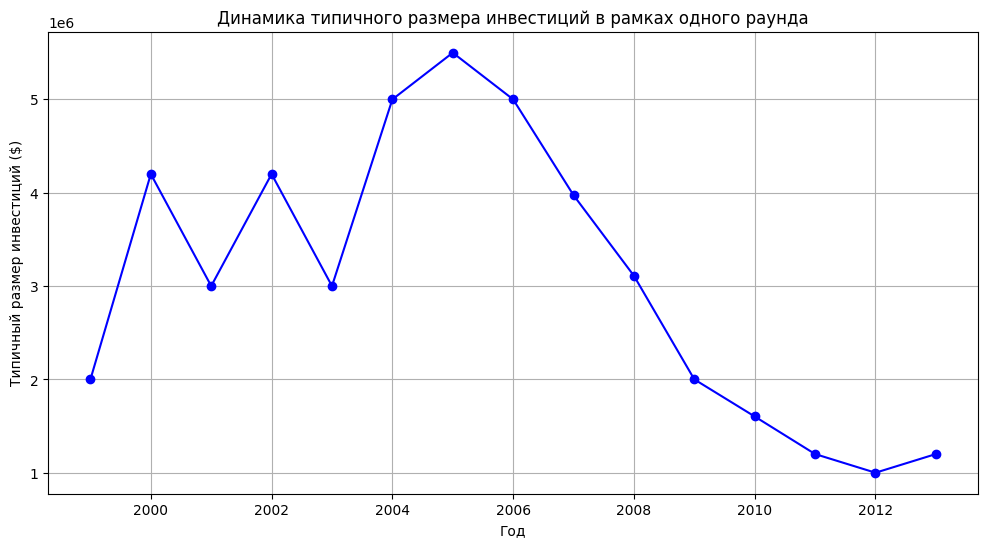

In [51]:
df_company['year'] = df_company['funded_at'].dt.year

summary = df_company.pivot_table(
    index='year', 
    values='raised_amount', 
    aggfunc=['median', 'count']
).reset_index()
summary.columns = ['year', 'typical_raised_amount', 'num_rounds']
summary = summary[summary['num_rounds'] > 50]
display(summary)
plt.figure(figsize=(12, 6))
plt.plot(summary['year'], summary['typical_raised_amount'], marker='o', linestyle='-', color='b')
plt.xlabel("Год")
plt.ylabel("Типичный размер инвестиций ($)")
plt.title("Динамика типичного размера инвестиций в рамках одного раунда")
plt.grid(True)
plt.show()



Используя полученные результаты, можно сделать вывод, что типичный размер собранных в рамках одного раунда средств был максимален в 2005 году.
А также видим, что в 2013 году наблюдалось увеличение количества раундов, а так же видим начало увеличения типичного размера средств собранных в рамках одного раунда после длительного спада

### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [53]:
df_edu_merged = pd.merge(df_people, df_education, how = 'left')
df_edu_merged.head(25)

,id,first_name,last_name,company_id,network_username,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,6265.0,University of Pennsylvania,1989-01-01
1,100,Peter,Lester,27.0,NaN,938.0,Universidad Catolica del Uruguay,2006-01-01
2,1000,Dr. Steven,E. Saunders,292.0,NaN,13098.0,Golden Gate University,1999-01-01
3,10000,Neil,Capel,2526.0,NaN,74038.0,Cairo University,NaN
4,100000,Sue,Pilsch,NaN,NaN,89666.0,Ohio State University,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN,257614.0,University of Washington,NaN
6,100006,Courtney,Homer,81558.0,jobsbostontech,257617.0,Trinity College,NaN
7,100009,Eddy,Badrina,NaN,NaN,257619.0,The State University of New York,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette,257626.0,Vassar College,2006-01-01
9,100011,Jeff,Grell,NaN,NaN,257626.0,Harvard University,2011-01-01
